# Fundamentals of Unsupervised Machine Learning

## Intro

<br /><br />

### Motivation

So far we have studied algorithms that work with labeled/annotated data and we divided those algorithms in two classes: Regression algorithms - data label is continuous variable; Classification algorithms - data label is discrete/categorical variable. The part of Machine Learning that deals with these kind of algorithms requiring labeled data points is called <b>Supervised Machine Learning</b>.

However, there are bunch of cases where data labels are not available! Moreover, most of the data in real world doesn't come with labels! Our goal is to still extract some insights out of these datasets without hiring people to do manual annotation which might be expensive or sometimes impossible. The part of machine learning dealing with unlabeled data is called <b>Unsupervised Machine Learning</b>.

Many people believe that unsupervised learning is the key to the general Artificial Intelligence as human babes do most of the learning without explicit supervision.

The goal of today's class is to introduce to some of the most popular unsupervised learning algorithms and go through some use-cases where these algorithms are applicable.


### Learning Objectives

At the end of this class, listeners will be able to:

<ul>
    <li>Understand conceptual differences between Supervised and Unsupervised machine learning.</li>
    <li>Get familiar with several essential unsupervised learning algorithms.</li>
    <li>Get intuition about when these algorithms shall be used.</li>
</ul>

### Reading Material

<ul>
    <li>K-Means algorithm: https://youtu.be/J0A_tkIgutw?list=PLnZuxOufsXnvftwTB1HL6mel1V32w0ThI <b>(mandatory)</b></li> 
    <li>Gaussian Mixture Models: https://youtu.be/I9dfOMAhsug?list=PLnZuxOufsXnvftwTB1HL6mel1V32w0ThI <b>(mandatory)</b></li>
    <li>EM algorithm for Gaussian Mixture Models: https://youtu.be/lMShR1vjbUo?list=PLnZuxOufsXnvftwTB1HL6mel1V32w0ThI</li>
    <li>DBSCAN algorithm: https://en.wikipedia.org/wiki/DBSCAN</li>
    <li>AMLD 2020 workshop material on unsupervised fraud detection: https://github.com/amld/workshop-unsupervised-fraud</li>
    <li><i>Some external links to material are also in below sections...</i></li>
</ul>

<br /><br /><br />

<big>**NOTE**</big>

The material of this class is quite large and doesn't explain everything in details. It is **ighly recommended** to take careful notes and ask me questions after/during class.

<br /><br /><br /><br />

## Clustering

Clustering is one of the most important and essential sub-topics of unsupervised machine learning that deals with algorithms that separate/cluster data into logical groups without requiring any labeling as we said.  
  
Below example compares unsupervised ml (namely, clustering algorithm) vs supervised ml.

<img src="https://assets.extrahop.com/images/blogart/supervised-vs-unsupervised-ml.png" />

### K-Means Clustering

The simplest clustering algorithm is K-means clustering, that separates groups of similar data points by <b>circles</b> as depicted in above picture.  

For details of the algorithm refer reading material in top section (~20 minute video).
  
<br /><br />  
  
<b>Pros:</b>  

<ul><li>Very simple and intuitive</li></ul>

<b>Cons:</b>  

<ul><li>Non-circular cluster shapes are hard to deal with.</li>
    <li>Number of clusters should be set manually, wrong number can result in poor results.</li>
    <li>Can get stuck in local minima (solution is to re-run several times and select best one).</li>
    <li>Exhibits poor performance in high-dimensional data due to "curse of dimensionality". Running dimensionality reduction algorithms (refer below) in advance is usually beneficial.</li>
</ul>

One of the use-cases of the K-means can be vector-quantization (information compression): https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

### Gaussian Mixture Models (GMMs) for Density Estimation and Clustering

Gaussian Mixture Models is a powerful unsupervised learning technique that is used: 1) for clustering; 2) Density Estimation - learning the distribution of the data in order to be able to sample/generate new data points from it. The latter application is most important use-case of GMM in practice.

For in-depth details of the algorithm refer reading material in top section.

<br /><br /><br />

<img src="images/unsupervised_ml/gmm.png" />
  
<b>Pros:</b>  

<ul>
    <li>If the number of clusters is large enough, can learn practically any density.</li>
    <li>Good Probabilistic Interpretation</li>
</ul>

<b>Cons:</b>  

<ul>
    <li>Number of clusters should be set manually, wrong number can result in poor results.</li>
    <li>Can get stuck in local minima (solution is to re-run several times and select best one).</li>
    <li>Exhibits poor performance in high-dimensional data due to "curse of dimensionality". Running dimensionality reduction algorithms (refer below) in advance is usually beneficial.</li>
</ul>

One of the practical use cases apart from clustering is <b>Anomaly/Outlier Detection</b>.

## Dimensionality Reduction and Feature Extraction

Apart from clustering, Dimensionality Reduction and Feature Extraction are another important sub-sections of unsupervised machine learning.  

It's quite common in Machine Learning to have relatively small dataset with a lot of features per sample. Due to the ["Curse of Dimensionality"](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e) very high dimensional spaces might cause serious problems which can be alleviated by **dimensionality reduction** algorithms (e.g. PCA, T-SNE, Autoencoders, ...). The goal is to reduce high dimensional feature space to smaller one that is easier to handle.  

Dimensionality reduction (e.g. Autoencoder) often gives us better features compared to the features in original feature space. That's why a term **"feature extraction"** comes in play. 

<br /><br />

**Details about PCA, T-SNE and Autoencoders**
<br /><br />
**PCA** - this algorithm was covered in previous classes, it uses basic linear algebra to find a new basis (in vector space with smaller dimension) for the data, such that axes in new basis are directions of maximal variance/spread of the data.  

**T-SNE** - this is non-linear dimensionality reduction algorithm that uses iterative solution. The details of the algorithm isn't really necessary but also can be easily understood from the Internet.

**Autoencder** - this is neural network that will be explained during the class. Some details can be seen here: https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d 



## Worked Example - Unsupervised Digit Recognition

In this section we are gonna learn handwritten digit recognition solely from images (without labels). We are going to use famous MNIST dataset.

<b>Algorithm:</b>  
1) Train a simple Autoencoder neural network to learn low-dimensional image vectors/features.  
2) Apply T-SNE on learned vectors to further reduce dimentions down to 2D. This allows us to vizually inspect the clusters.        
3) Apply GMM to separate clusters out.  

Note that, this algorithm isn't well suited for practical usage, because when we have labels, there are much easier and faster supervised techniques to do the same task - digit recognition on MNIST. However, this algorithm is good gaining intuition about different unsupervised algorithms in practice and how to put them together for a single task.

In [0]:
# Python core library
import os
from typing import Tuple, List
import random

# Scientific utilities
import numpy as np
import pandas as pd
from scipy.stats import norm as ndist
from scipy import linalg
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture as GMM

# Visualization Tools
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline
import seaborn as sns

# PyTorch library
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

#### Preparing Data

Conveniently, PyTorch comes with pre-defined MNIST dataset so we are going to use it directly.

In [0]:
DATA_DIR = 'mnistdata' # directory where MNIST dataset will be downloaded and stored

BATCH_SIZE = 128 # batch size for training

In [0]:
# Downloading MNIST data and creating PyTorch Dataloader classes for training and test sets.

def get_mnist_ds(train: bool):

    return torchvision.datasets.MNIST(DATA_DIR, 
                                      train=train, 
                                      transform=transforms.Compose([
                                                    transforms.ToTensor(),
                                                ]), 
                                      target_transform=None, 
                                      download=True)

def get_mnist_dls():
    
    train_ds = get_mnist_ds(train=True)
    valid_ds = get_mnist_ds(train=False)
    
    return (torch.utils.data.DataLoader(train_ds, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True), # data will be shuffled on every epoch
            
            torch.utils.data.DataLoader(valid_ds, 
                                        batch_size=2 * BATCH_SIZE, # batch size of test set can be larger because we don't need gradients.
                                        shuffle=False)) # in test set we don't need shuffling

In [4]:
train_dl, valid_dl = get_mnist_dls()

len(train_dl.dataset), len(valid_dl.dataset)

(60000, 10000)

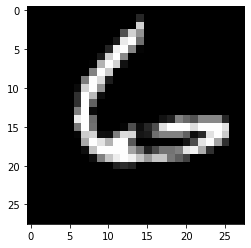

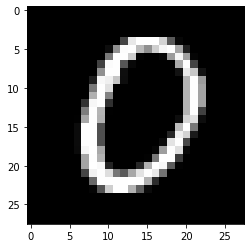

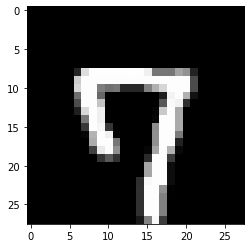

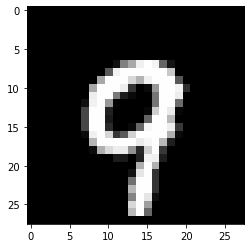

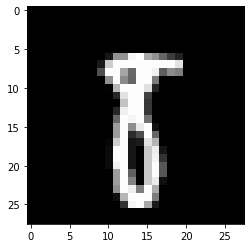

In [5]:
# showing same samples from the training set

for i, (x, y) in enumerate(train_dl):
    plt.imshow(x[0][0], cmap='gray')
    plt.show()
    if i > 3: break

#### Defining simple neural Autoencoder model in PyTorch 

Below we will define Encoder, Decoder and whole Autoencoder separately, in 3 different classes. 

We are going to use PyTorch - one of the most popular deep learning frameworks for defining our neural network and training. 

If you are unfamiliar with the stuff we gonna define below, please refer to the official documentation: https://pytorch.org/docs/stable/index.html

In [0]:
class Encoder(nn.Module): # every custom component (neural network) we define in PyTorch should inherit from nn.Module class
    def __init__(self, inp_shape: Tuple[int, int], hidden_dim: int, out_dim: int):
        super().__init__()
        
        self.enc = nn.Sequential(nn.Flatten(), # Converting square image (28, 28) into long flat vector which is more convenient to work with.
                                 nn.Linear(np.prod(inp_shape), hidden_dim), # Linear fully connected layer.
                                 nn.ReLU(), # Rectified Linear Unit activation function for non-linearity. 
                                 nn.Linear(hidden_dim, out_dim))
            
    def forward(self, x): # here we define forward-pass logic of our neural network.
        return self.enc(x)

class Decoder(nn.Module):
    def __init__(self, inp_shape: Tuple[int, int], hidden_dim: int, out_dim: int):
        super().__init__()
        
        self.inp_shape = inp_shape
        
        self.dec = nn.Sequential(nn.Linear(out_dim, hidden_dim),
                                 nn.ReLU(),
                                 nn.Linear(hidden_dim, np.prod(inp_shape)))
                
    def forward(self, x): 
        # output is passed through sigmoid function to squash numbers in (0, 1) interval that would correspond to greyscale values of the original input.
        return torch.sigmoid(self.dec(x)).view(x.shape[0], *self.inp_shape) 

class AutoEncoder(nn.Module):
    def __init__(self, inp_shape: Tuple[int, int], hidden_dim: int, out_dim: int):
        super().__init__()
        
        # here we just combine Encoder and Decoder defined above.
        self.ae = nn.Sequential(Encoder(inp_shape, hidden_dim, out_dim),
                                Decoder(inp_shape, hidden_dim, out_dim))
        
    def forward(self, x): 
        return self.ae(x)

In [7]:
# run this cell to see visually neural network we defined

AutoEncoder(inp_shape=(1, 28, 28), hidden_dim=512, out_dim=20) 

AutoEncoder(
  (ae): Sequential(
    (0): Encoder(
      (enc): Sequential(
        (0): Flatten()
        (1): Linear(in_features=784, out_features=512, bias=True)
        (2): ReLU()
        (3): Linear(in_features=512, out_features=20, bias=True)
      )
    )
    (1): Decoder(
      (dec): Sequential(
        (0): Linear(in_features=20, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=784, bias=True)
      )
    )
  )
)

In [0]:
# this is a helper function we gonna use during training to visualize intermediary results. 

def show_summary(valid_dl: DataLoader, model: nn.Module):
    """This is a helper function for visualizing model output quality during the training process."""
    
    N_SAMPLES = 15
    
    model.eval()
    
    actuals, preds = [], []
    with torch.no_grad():
        for i, (x, y) in enumerate(valid_dl.dataset):
            
            actuals.append(x)
            
            recon_x = model(x.unsqueeze(0).cuda()).cpu()
            
            preds.append(recon_x.squeeze(0))
            
            if i + 1 == N_SAMPLES:
                break
                
    model.train()
            
    grid = make_grid([*actuals, *preds], pad_value=1, padding=1, nrow=N_SAMPLES)

    plt.figure(figsize=(20, 4))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

In [0]:
# When we are dealing with Machine Learning algorithms in general, there are lots of random components in our code. For example, every time
# you instantiate your Autoencoder model, weights will be randomly initialized. Consequently, you might achieve different results if you retrain model several times.
# It's very important to have deterministic behaviour to achieve consistent results between experiments, so we use below function that fixes random seed 
# in potential places we are gonna use.

def seed_everything(seed=1234):

    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [0]:
# here we define training logic for our neural network.

def train_ae(train_dl: DataLoader, 
             valid_dl: DataLoader,
             model: nn.Module,
             n_epochs: int,
             max_iters: int = -1):
    
    LOG_INTERVAL = 5
    SUMMARY_INTERVAL = 10
    
    model = model.cuda() # moving our model on GPU.
    
    # defining Mean Squared Loss function and optimizer (we will use Adam here)
    crit = nn.MSELoss(reduction='mean')
    optim = torch.optim.Adam(model.parameters())
    
    acc_loss = 0
    
    i = 1
    for epoch in range(n_epochs):
        for x, _ in train_dl:
            
            # this is necessary before every train step. 
            # Why? Ask Google or me :) https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch 
            optim.zero_grad() 
            
            x = x.cuda()
            
            x_recon = model(x) # forward-pass in neural network.
            
            loss = crit(x, x_recon) # calculating MSE loss between input image and reconstructed image.
            
            acc_loss += loss.item() # accumulating loss to display in summary
            
            loss.backward() # computing the gradients (doing back-propagation algorithm)
            
            optim.step() # updating model weights using computed gradients.
            
            # printing summary
            if (i + 1) % LOG_INTERVAL == 0:
                print('epoch %d | iter %d | loss %.5f' % (epoch + 1, i + 1, acc_loss / LOG_INTERVAL))
                acc_loss = 0
                
            if (i + 1) % SUMMARY_INTERVAL == 0:
                show_summary(valid_dl, model)
                
            i += 1
            
            if i == max_iters:
                return

In [0]:
# we will learn 20 dimensional feature vectors from images by training this Autoencoder below.

seed_everything()

ae = AutoEncoder(inp_shape=(1, 28, 28), hidden_dim=512, out_dim=20)

epoch 1 | iter 5 | loss 0.17415
epoch 1 | iter 10 | loss 0.13049


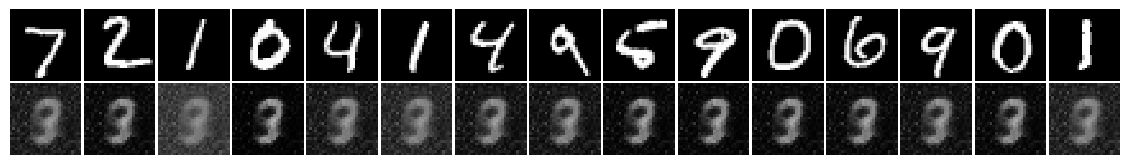

epoch 1 | iter 15 | loss 0.07788
epoch 1 | iter 20 | loss 0.07383


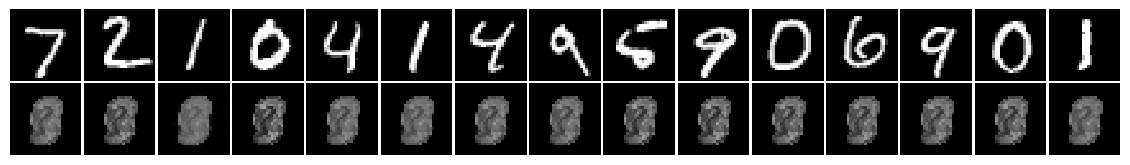

epoch 1 | iter 25 | loss 0.07249
epoch 1 | iter 30 | loss 0.07305


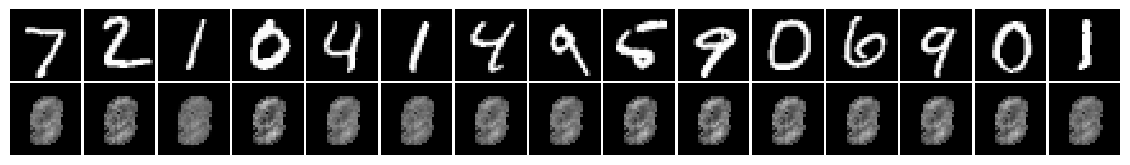

epoch 1 | iter 35 | loss 0.07060
epoch 1 | iter 40 | loss 0.06884


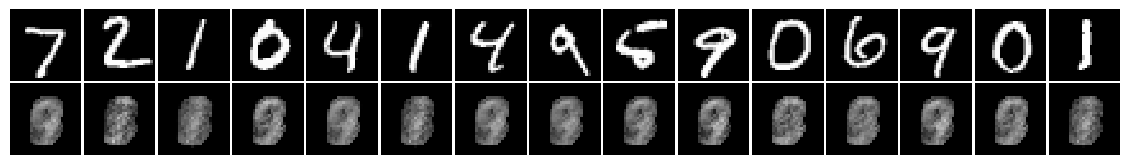

epoch 1 | iter 45 | loss 0.06770
epoch 1 | iter 50 | loss 0.06573


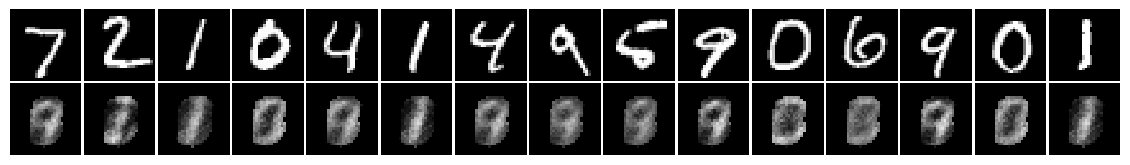

epoch 1 | iter 55 | loss 0.06165
epoch 1 | iter 60 | loss 0.06192


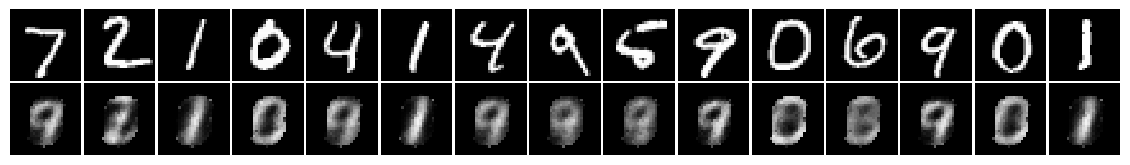

epoch 1 | iter 65 | loss 0.05904
epoch 1 | iter 70 | loss 0.05544


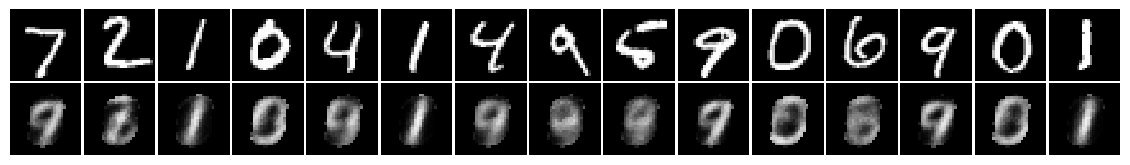

epoch 1 | iter 75 | loss 0.05434
epoch 1 | iter 80 | loss 0.05452


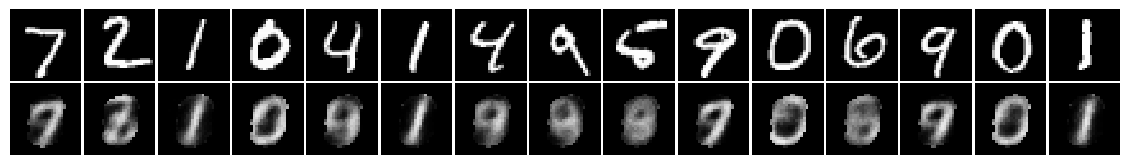

epoch 1 | iter 85 | loss 0.05102
epoch 1 | iter 90 | loss 0.05056


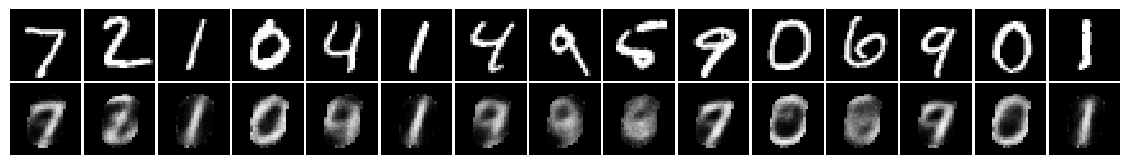

epoch 1 | iter 95 | loss 0.04812
epoch 1 | iter 100 | loss 0.04715


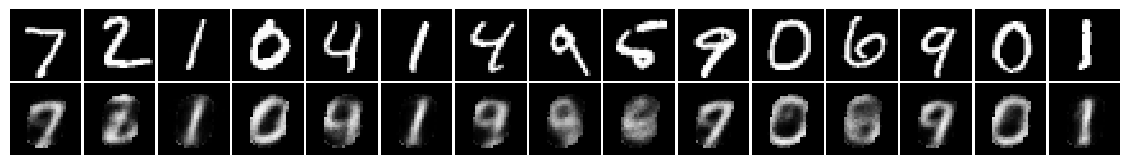

epoch 1 | iter 105 | loss 0.04650
epoch 1 | iter 110 | loss 0.04434


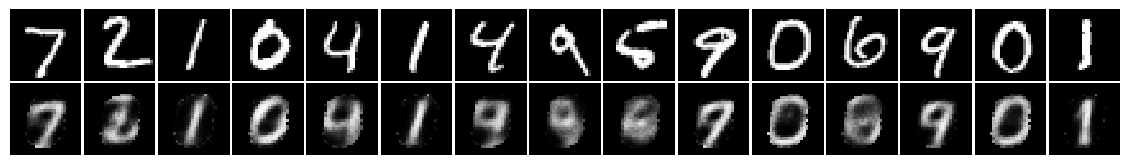

epoch 1 | iter 115 | loss 0.04188
epoch 1 | iter 120 | loss 0.04052


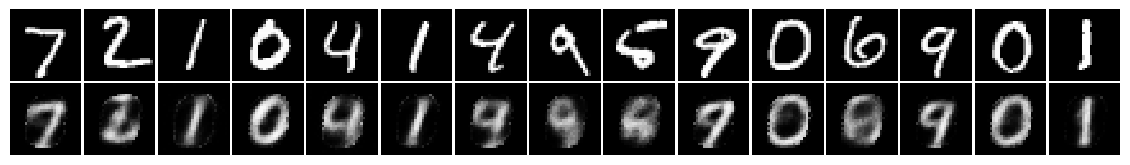

epoch 1 | iter 125 | loss 0.04016
epoch 1 | iter 130 | loss 0.03923


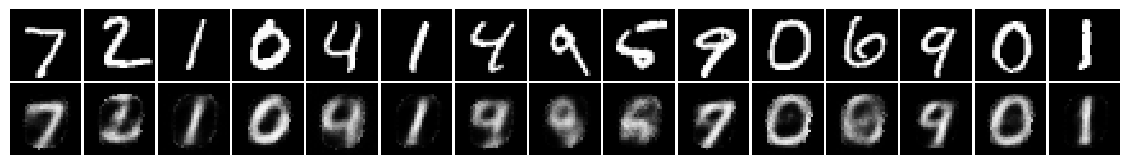

epoch 1 | iter 135 | loss 0.03640
epoch 1 | iter 140 | loss 0.03490


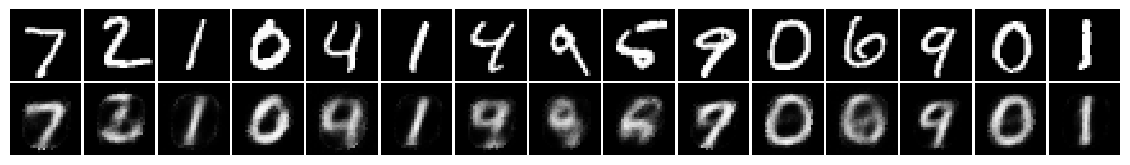

epoch 1 | iter 145 | loss 0.03314
epoch 1 | iter 150 | loss 0.03257


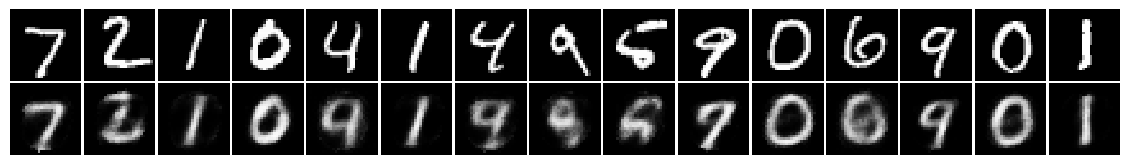

epoch 1 | iter 155 | loss 0.03155
epoch 1 | iter 160 | loss 0.02968


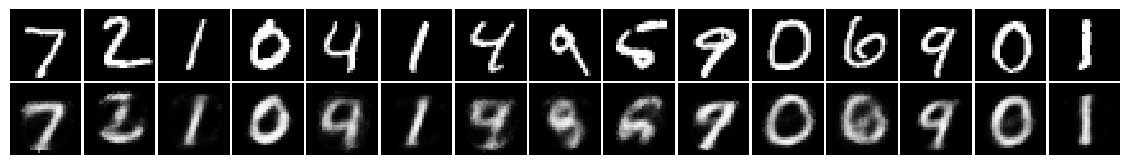

epoch 1 | iter 165 | loss 0.03015
epoch 1 | iter 170 | loss 0.02841


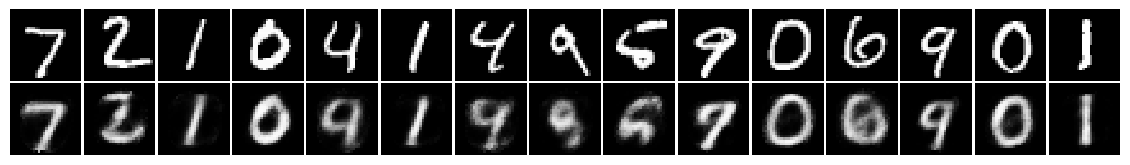

epoch 1 | iter 175 | loss 0.02789
epoch 1 | iter 180 | loss 0.02766


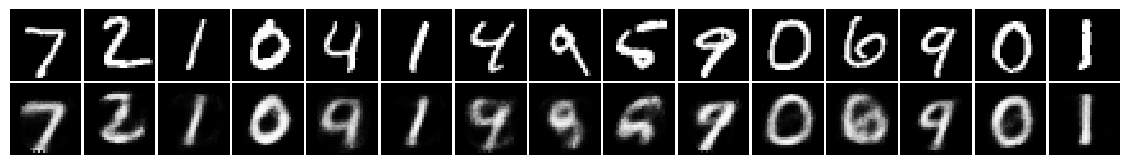

epoch 1 | iter 185 | loss 0.02698
epoch 1 | iter 190 | loss 0.02636


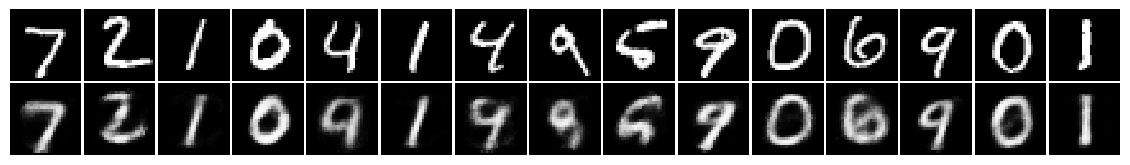

epoch 1 | iter 195 | loss 0.02563
epoch 1 | iter 200 | loss 0.02628


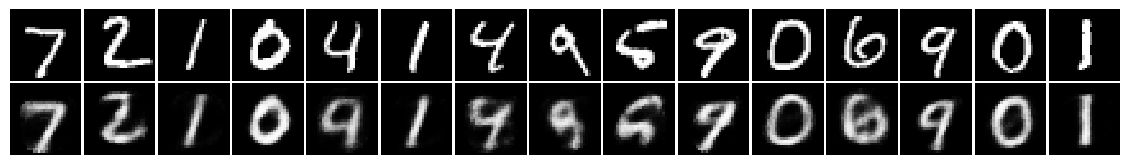

epoch 1 | iter 205 | loss 0.02449
epoch 1 | iter 210 | loss 0.02491


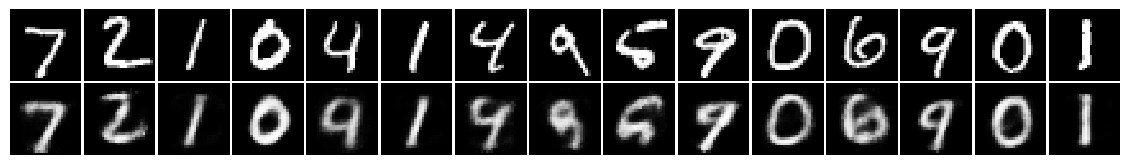

epoch 1 | iter 215 | loss 0.02421
epoch 1 | iter 220 | loss 0.02389


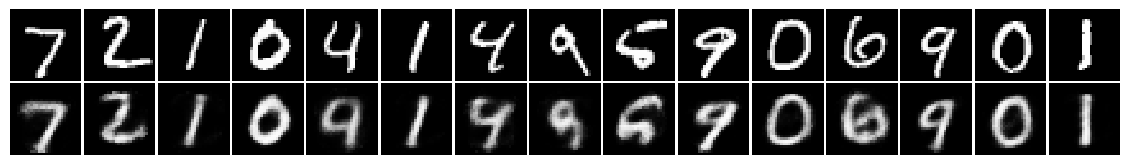

epoch 1 | iter 225 | loss 0.02369
epoch 1 | iter 230 | loss 0.02362


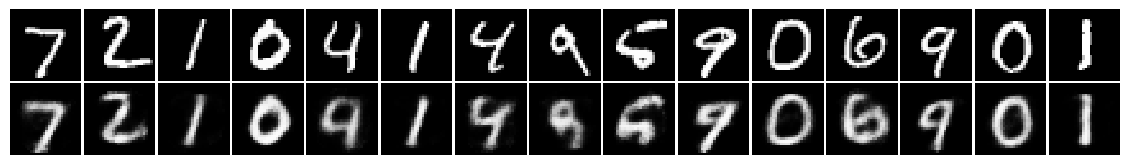

epoch 1 | iter 235 | loss 0.02375
epoch 1 | iter 240 | loss 0.02245


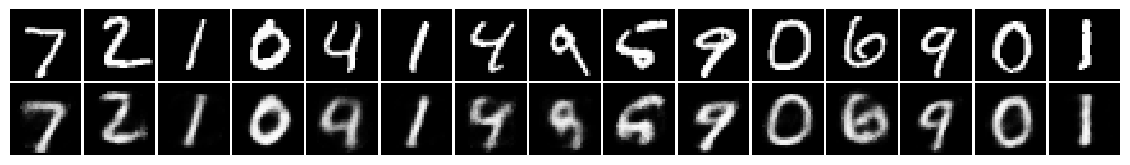

epoch 1 | iter 245 | loss 0.02141
epoch 1 | iter 250 | loss 0.02178


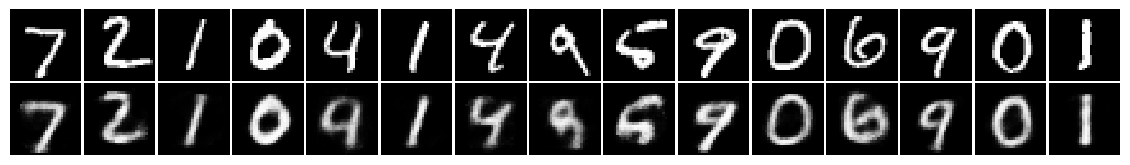

epoch 1 | iter 255 | loss 0.02169
epoch 1 | iter 260 | loss 0.02157


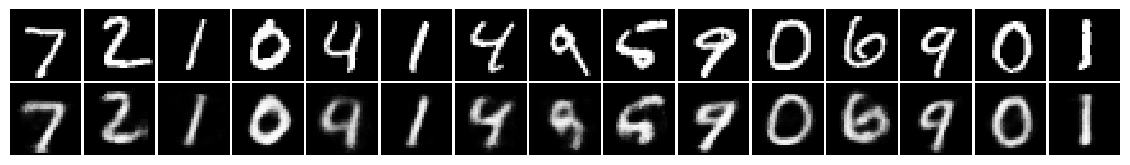

epoch 1 | iter 265 | loss 0.02105
epoch 1 | iter 270 | loss 0.01995


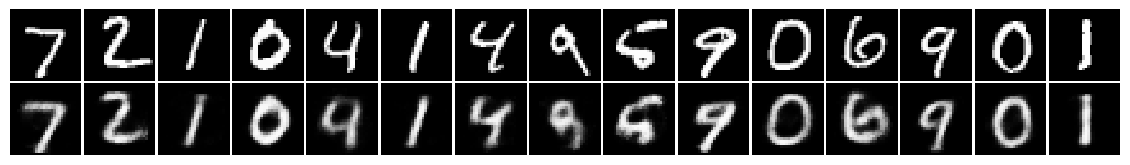

epoch 1 | iter 275 | loss 0.02048
epoch 1 | iter 280 | loss 0.02024


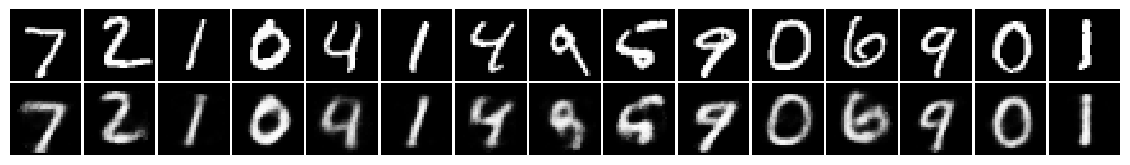

epoch 1 | iter 285 | loss 0.02028
epoch 1 | iter 290 | loss 0.02024


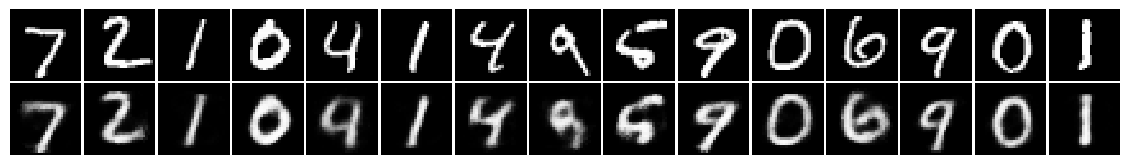

epoch 1 | iter 295 | loss 0.02030
epoch 1 | iter 300 | loss 0.01961


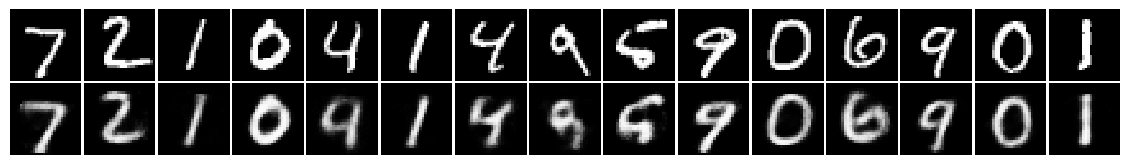

epoch 1 | iter 305 | loss 0.01912
epoch 1 | iter 310 | loss 0.01834


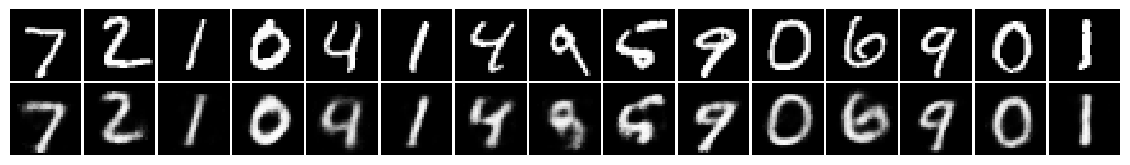

epoch 1 | iter 315 | loss 0.01893
epoch 1 | iter 320 | loss 0.01948


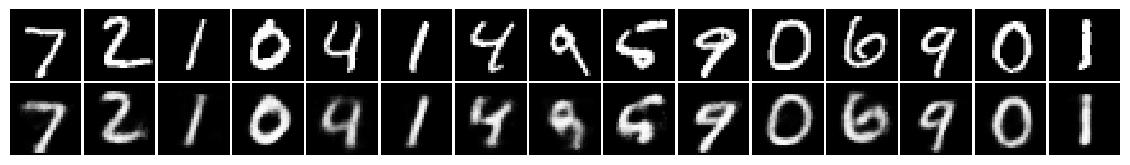

epoch 1 | iter 325 | loss 0.01841
epoch 1 | iter 330 | loss 0.01811


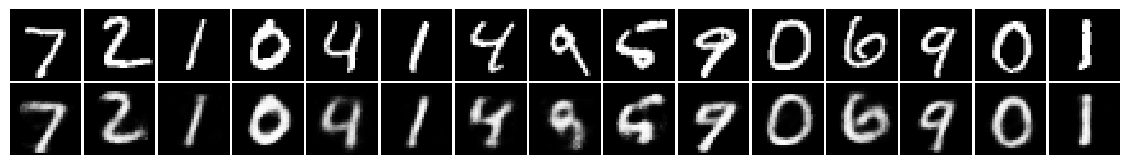

epoch 1 | iter 335 | loss 0.01794
epoch 1 | iter 340 | loss 0.01844


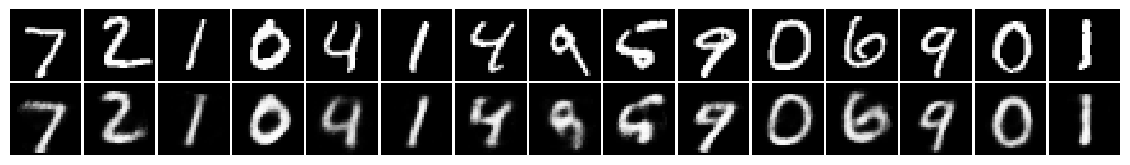

epoch 1 | iter 345 | loss 0.01836
epoch 1 | iter 350 | loss 0.01781


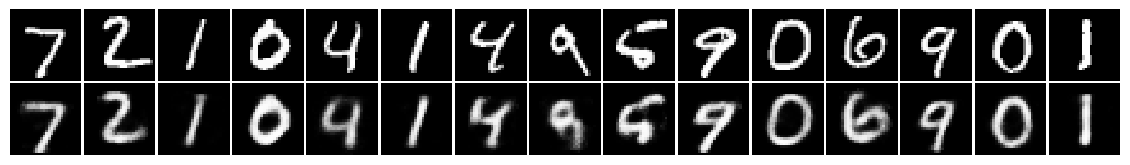

epoch 1 | iter 355 | loss 0.01803
epoch 1 | iter 360 | loss 0.01733


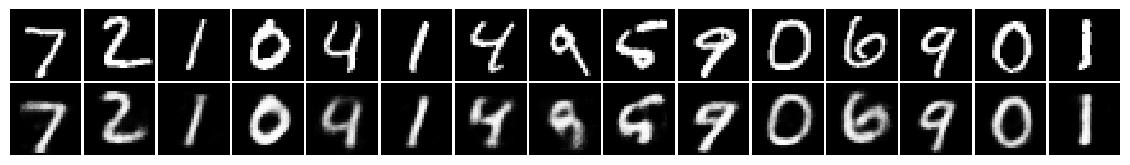

epoch 1 | iter 365 | loss 0.01837
epoch 1 | iter 370 | loss 0.01775


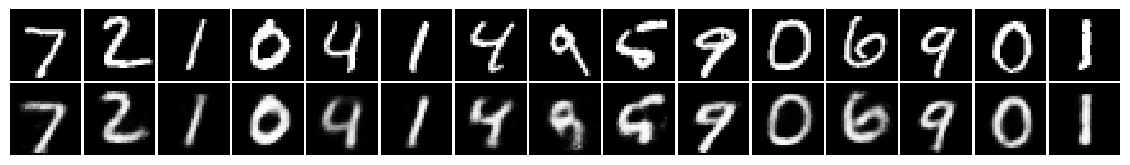

epoch 1 | iter 375 | loss 0.01688
epoch 1 | iter 380 | loss 0.01675


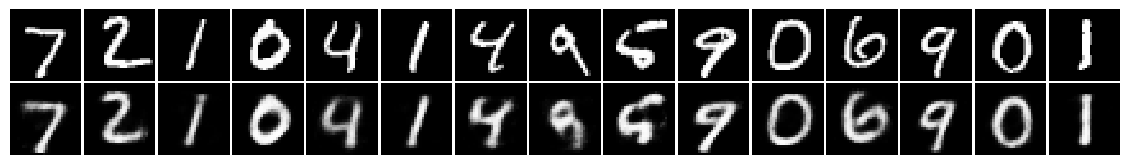

epoch 1 | iter 385 | loss 0.01724
epoch 1 | iter 390 | loss 0.01672


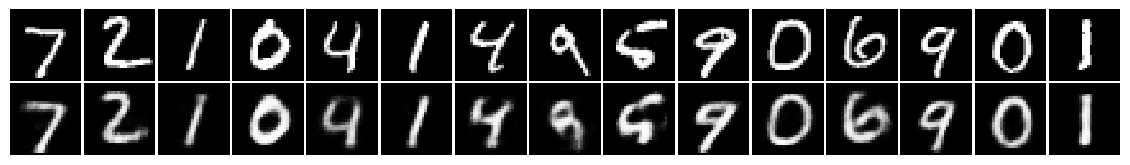

epoch 1 | iter 395 | loss 0.01691
epoch 1 | iter 400 | loss 0.01729


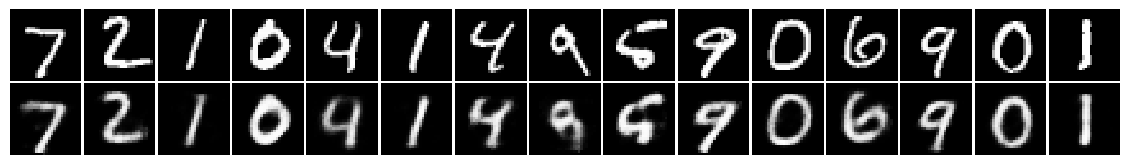

epoch 1 | iter 405 | loss 0.01681
epoch 1 | iter 410 | loss 0.01687


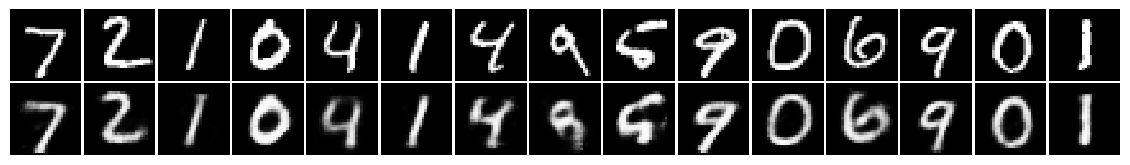

epoch 1 | iter 415 | loss 0.01659
epoch 1 | iter 420 | loss 0.01629


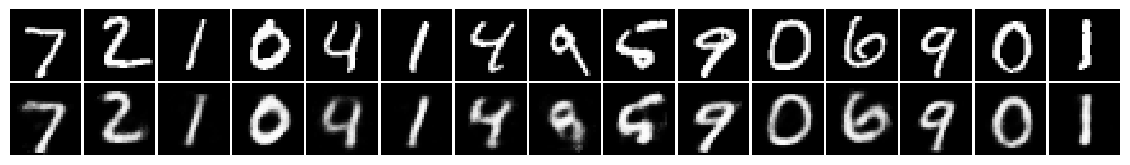

epoch 1 | iter 425 | loss 0.01615
epoch 1 | iter 430 | loss 0.01597


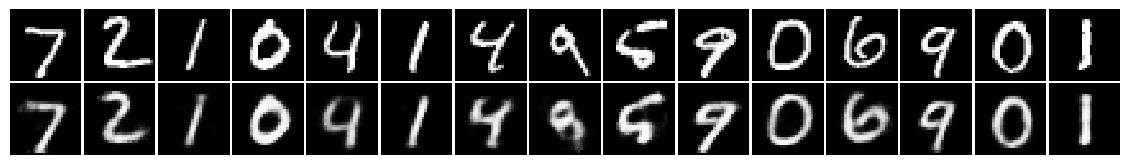

epoch 1 | iter 435 | loss 0.01640
epoch 1 | iter 440 | loss 0.01590


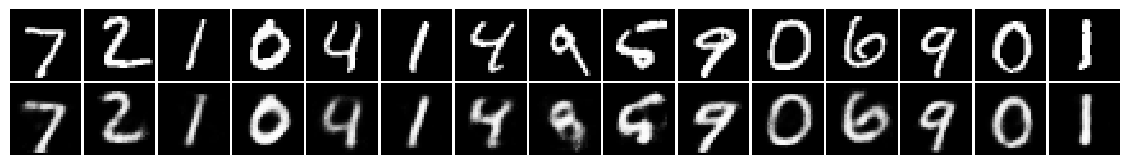

epoch 1 | iter 445 | loss 0.01540
epoch 1 | iter 450 | loss 0.01566


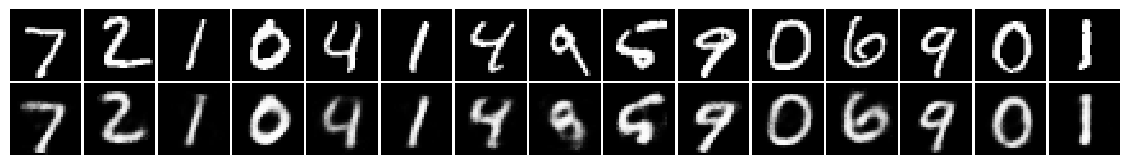

epoch 1 | iter 455 | loss 0.01555
epoch 1 | iter 460 | loss 0.01577


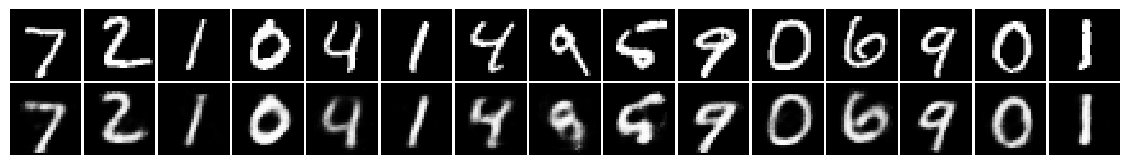

epoch 1 | iter 465 | loss 0.01596
epoch 1 | iter 470 | loss 0.01541


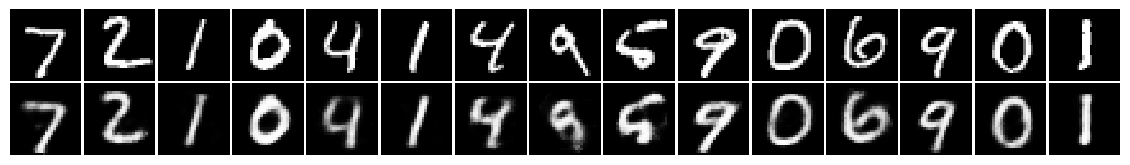

epoch 2 | iter 475 | loss 0.01519
epoch 2 | iter 480 | loss 0.01535


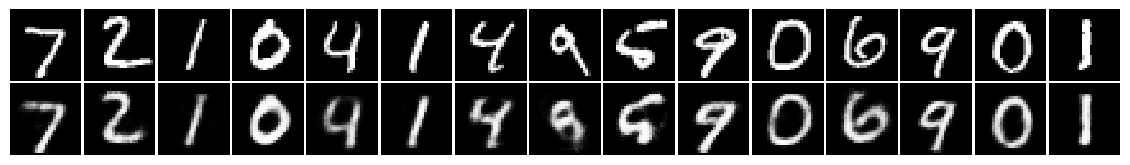

epoch 2 | iter 485 | loss 0.01569
epoch 2 | iter 490 | loss 0.01535


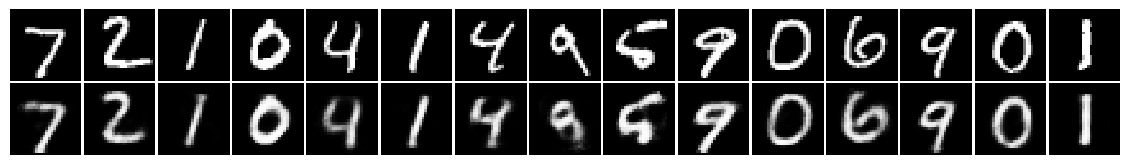

epoch 2 | iter 495 | loss 0.01495
epoch 2 | iter 500 | loss 0.01497


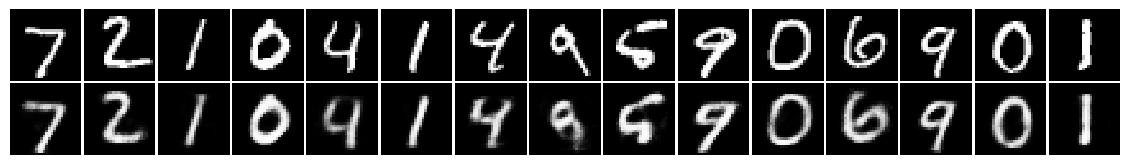

epoch 2 | iter 505 | loss 0.01447
epoch 2 | iter 510 | loss 0.01520


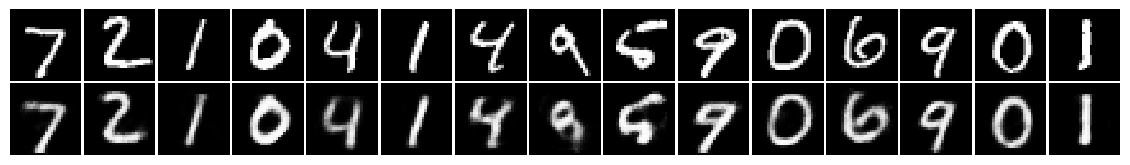

epoch 2 | iter 515 | loss 0.01467
epoch 2 | iter 520 | loss 0.01508


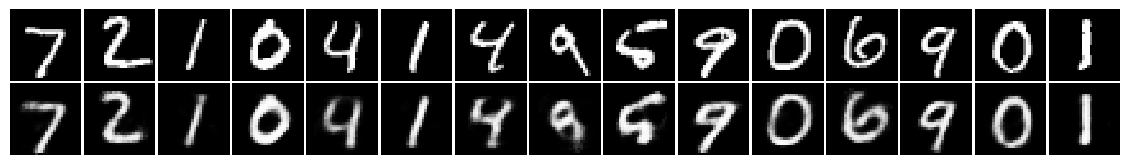

epoch 2 | iter 525 | loss 0.01534
epoch 2 | iter 530 | loss 0.01396


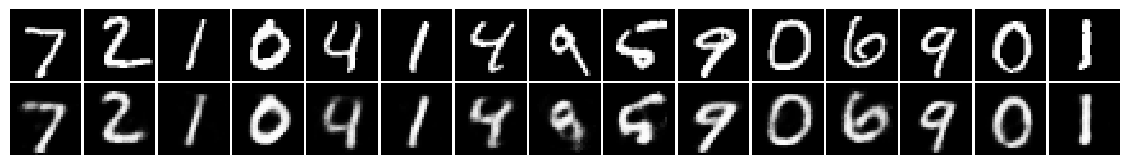

epoch 2 | iter 535 | loss 0.01480
epoch 2 | iter 540 | loss 0.01444


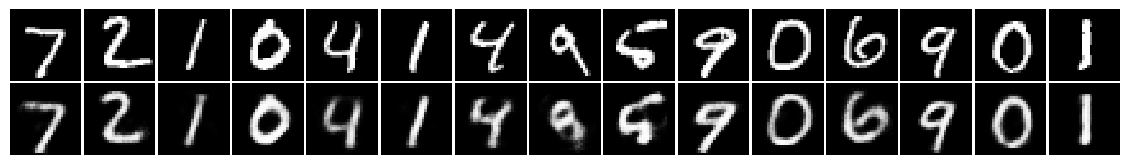

epoch 2 | iter 545 | loss 0.01444
epoch 2 | iter 550 | loss 0.01451


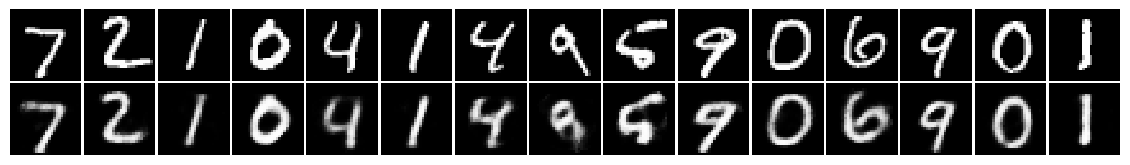

epoch 2 | iter 555 | loss 0.01465
epoch 2 | iter 560 | loss 0.01414


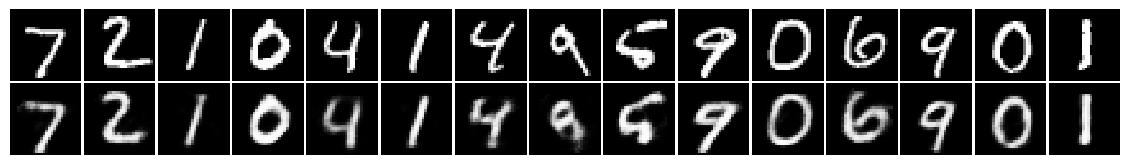

epoch 2 | iter 565 | loss 0.01410
epoch 2 | iter 570 | loss 0.01399


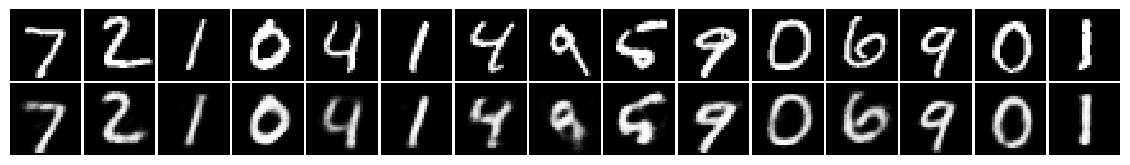

epoch 2 | iter 575 | loss 0.01420
epoch 2 | iter 580 | loss 0.01384


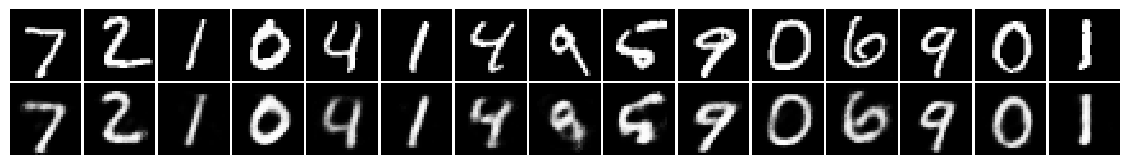

epoch 2 | iter 585 | loss 0.01431
epoch 2 | iter 590 | loss 0.01367


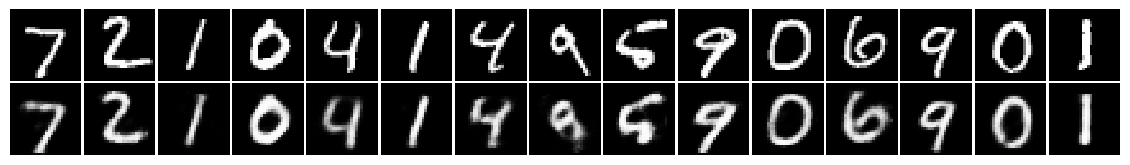

epoch 2 | iter 595 | loss 0.01403
epoch 2 | iter 600 | loss 0.01393


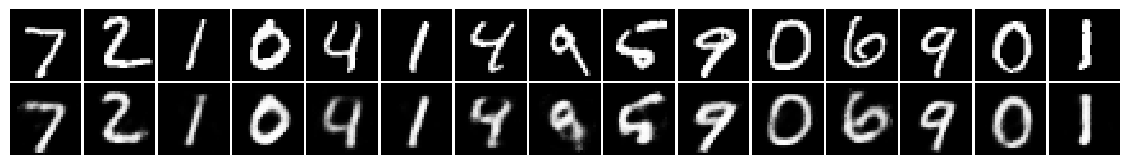

epoch 2 | iter 605 | loss 0.01410
epoch 2 | iter 610 | loss 0.01374


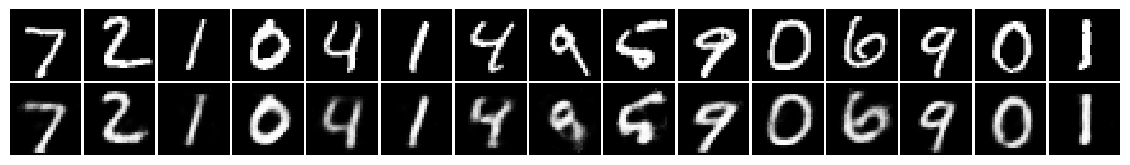

epoch 2 | iter 615 | loss 0.01415
epoch 2 | iter 620 | loss 0.01389


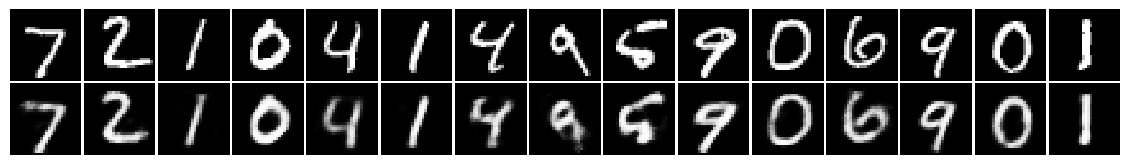

epoch 2 | iter 625 | loss 0.01364
epoch 2 | iter 630 | loss 0.01392


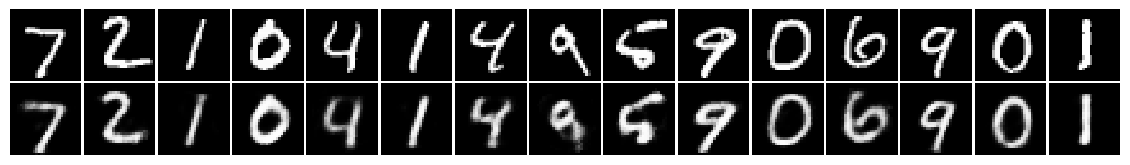

epoch 2 | iter 635 | loss 0.01392
epoch 2 | iter 640 | loss 0.01385


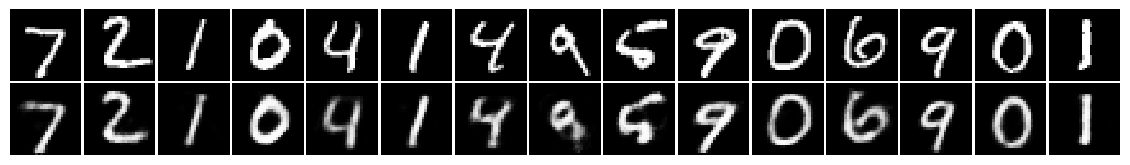

epoch 2 | iter 645 | loss 0.01413
epoch 2 | iter 650 | loss 0.01418


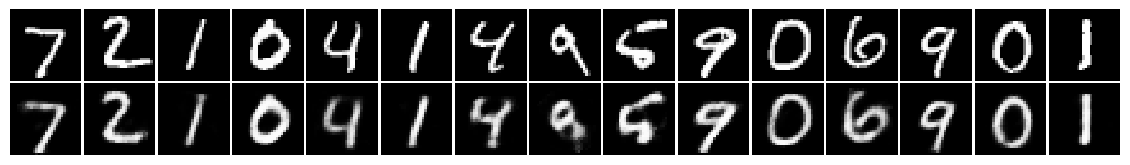

epoch 2 | iter 655 | loss 0.01353
epoch 2 | iter 660 | loss 0.01371


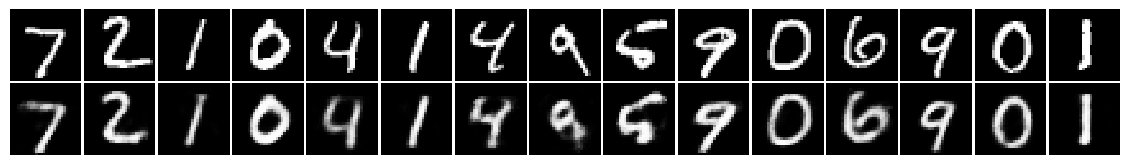

epoch 2 | iter 665 | loss 0.01361
epoch 2 | iter 670 | loss 0.01345


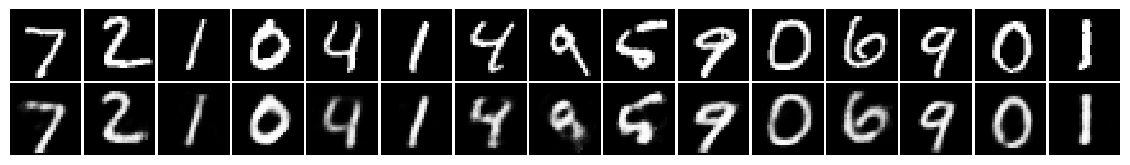

epoch 2 | iter 675 | loss 0.01316
epoch 2 | iter 680 | loss 0.01339


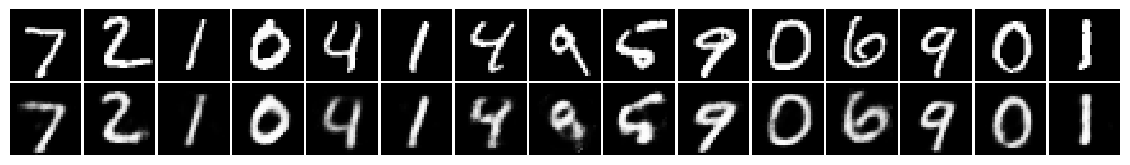

epoch 2 | iter 685 | loss 0.01376
epoch 2 | iter 690 | loss 0.01318


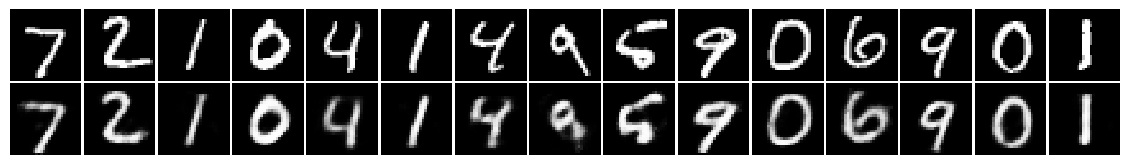

epoch 2 | iter 695 | loss 0.01389
epoch 2 | iter 700 | loss 0.01348


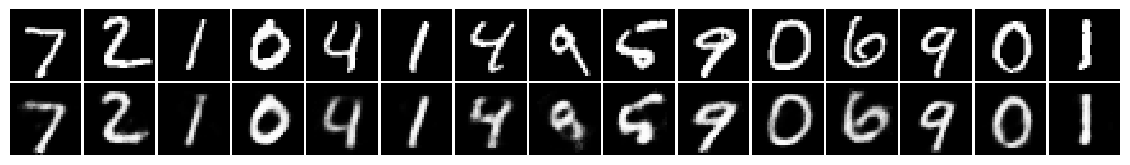

epoch 2 | iter 705 | loss 0.01345
epoch 2 | iter 710 | loss 0.01326


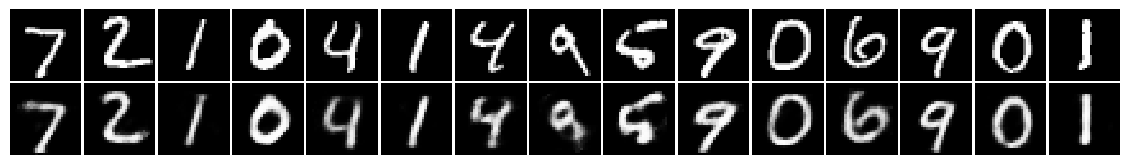

epoch 2 | iter 715 | loss 0.01359
epoch 2 | iter 720 | loss 0.01331


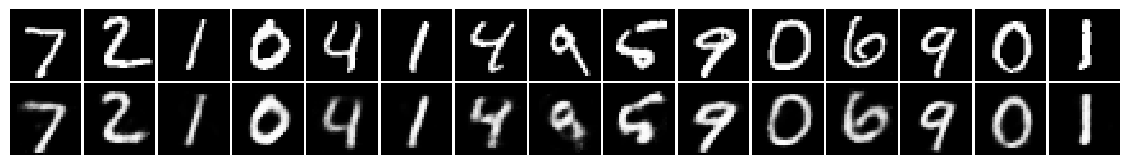

epoch 2 | iter 725 | loss 0.01263
epoch 2 | iter 730 | loss 0.01320


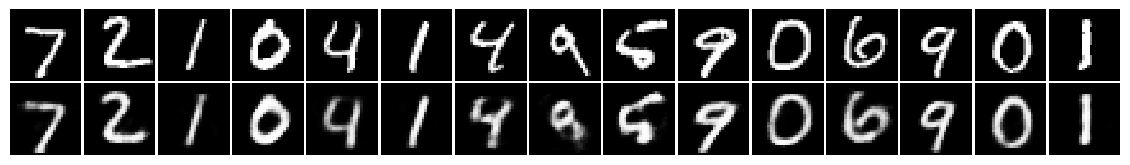

epoch 2 | iter 735 | loss 0.01335
epoch 2 | iter 740 | loss 0.01305


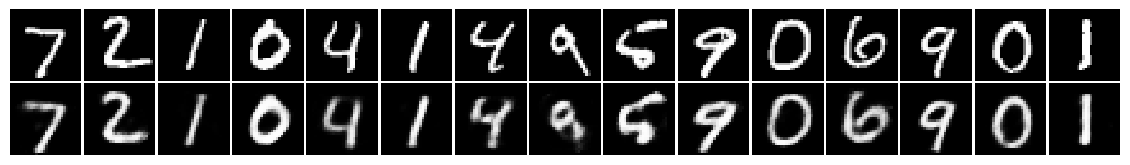

epoch 2 | iter 745 | loss 0.01273
epoch 2 | iter 750 | loss 0.01287


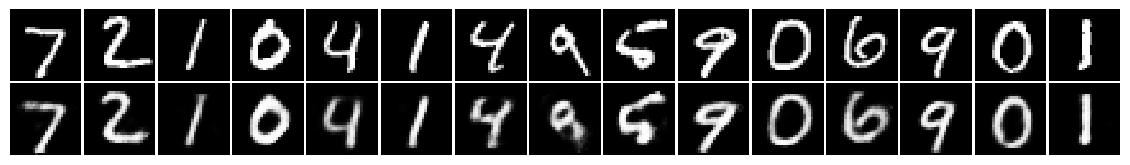

epoch 2 | iter 755 | loss 0.01264
epoch 2 | iter 760 | loss 0.01269


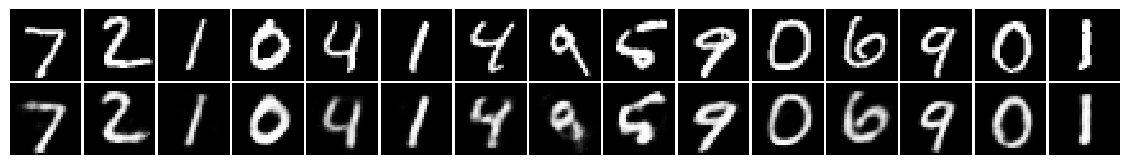

epoch 2 | iter 765 | loss 0.01314
epoch 2 | iter 770 | loss 0.01335


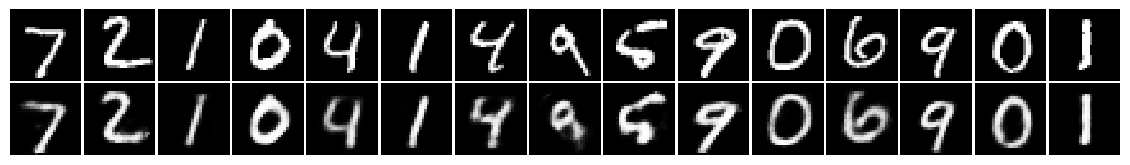

epoch 2 | iter 775 | loss 0.01274
epoch 2 | iter 780 | loss 0.01299


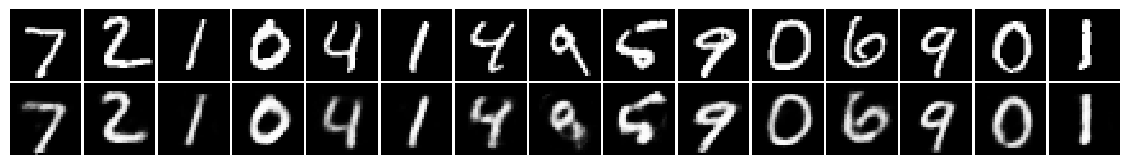

epoch 2 | iter 785 | loss 0.01281
epoch 2 | iter 790 | loss 0.01323


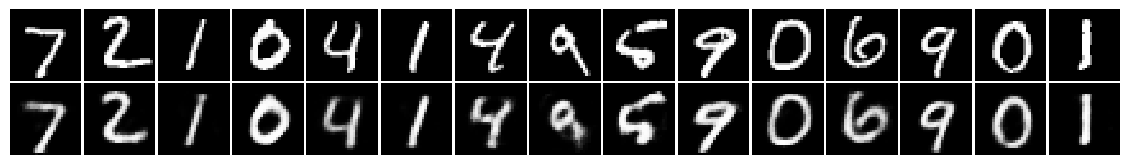

epoch 2 | iter 795 | loss 0.01285
epoch 2 | iter 800 | loss 0.01269


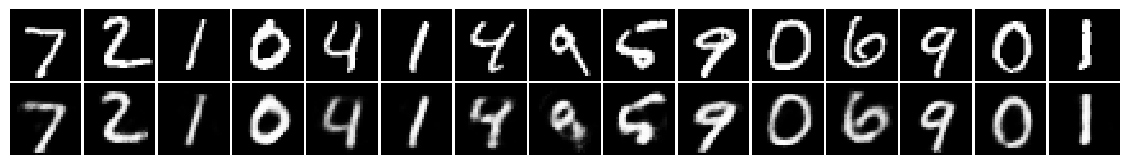

epoch 2 | iter 805 | loss 0.01259
epoch 2 | iter 810 | loss 0.01247


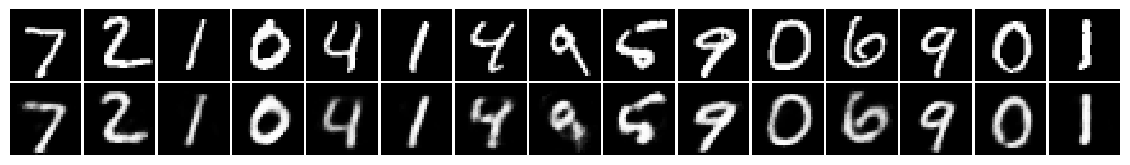

epoch 2 | iter 815 | loss 0.01302
epoch 2 | iter 820 | loss 0.01240


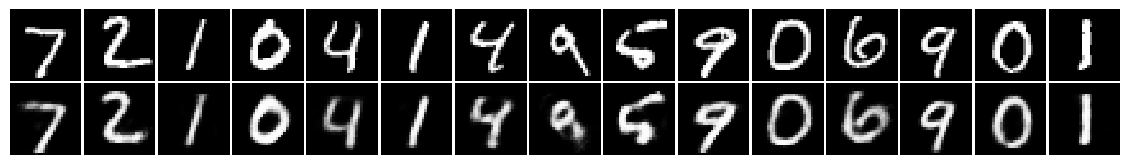

epoch 2 | iter 825 | loss 0.01264
epoch 2 | iter 830 | loss 0.01270


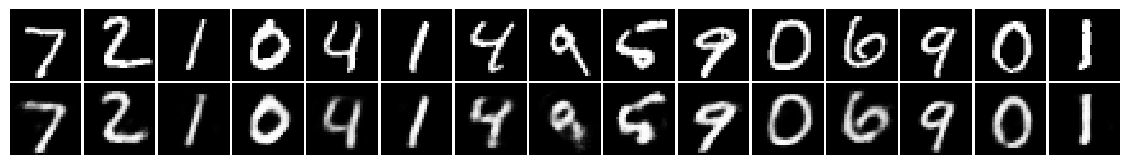

epoch 2 | iter 835 | loss 0.01251
epoch 2 | iter 840 | loss 0.01244


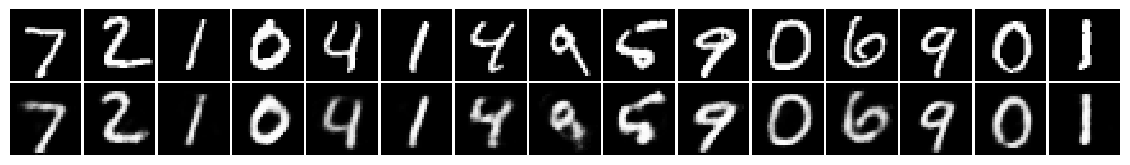

epoch 2 | iter 845 | loss 0.01260
epoch 2 | iter 850 | loss 0.01248


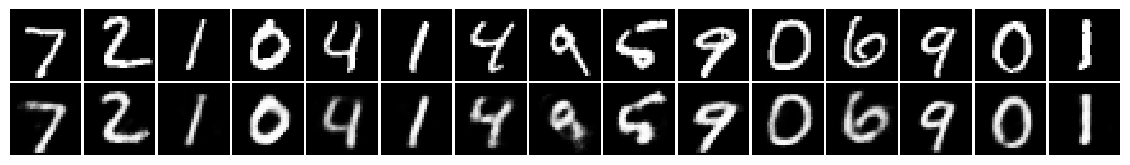

epoch 2 | iter 855 | loss 0.01289
epoch 2 | iter 860 | loss 0.01252


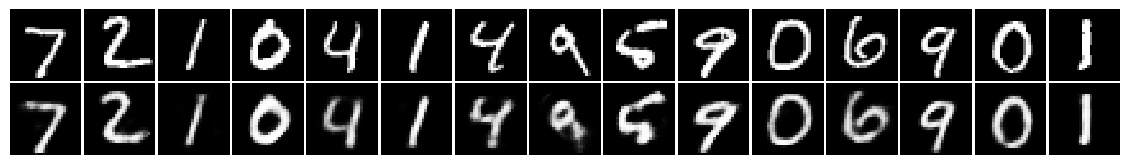

epoch 2 | iter 865 | loss 0.01312
epoch 2 | iter 870 | loss 0.01222


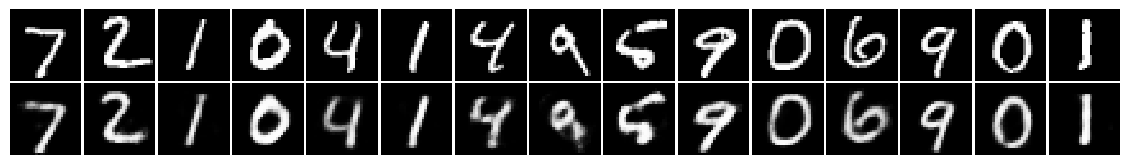

epoch 2 | iter 875 | loss 0.01234
epoch 2 | iter 880 | loss 0.01207


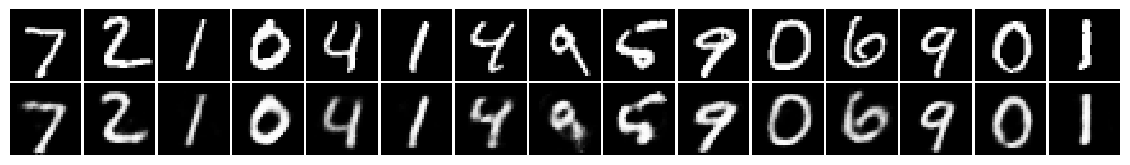

epoch 2 | iter 885 | loss 0.01261
epoch 2 | iter 890 | loss 0.01256


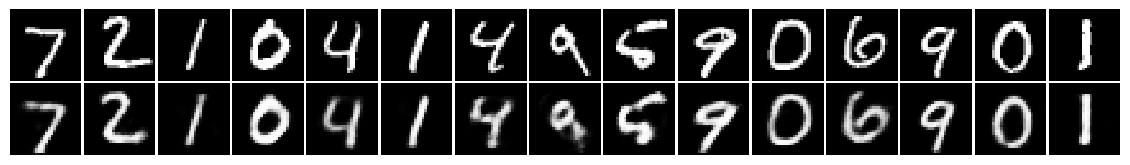

epoch 2 | iter 895 | loss 0.01225
epoch 2 | iter 900 | loss 0.01231


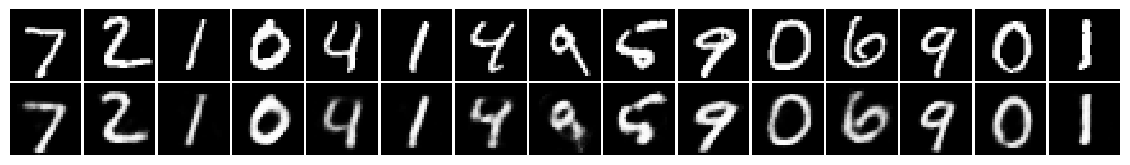

epoch 2 | iter 905 | loss 0.01234
epoch 2 | iter 910 | loss 0.01270


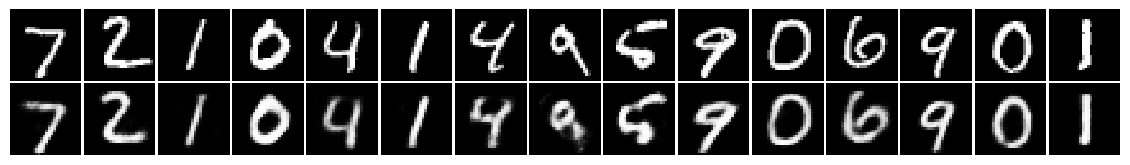

epoch 2 | iter 915 | loss 0.01252
epoch 2 | iter 920 | loss 0.01235


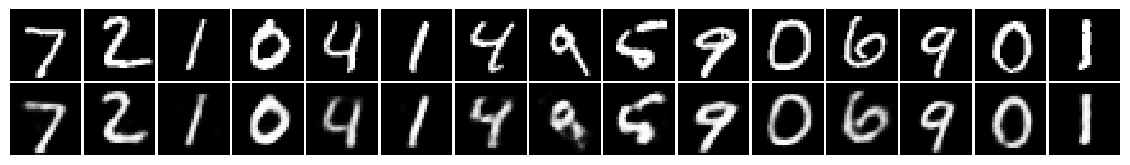

epoch 2 | iter 925 | loss 0.01260
epoch 2 | iter 930 | loss 0.01273


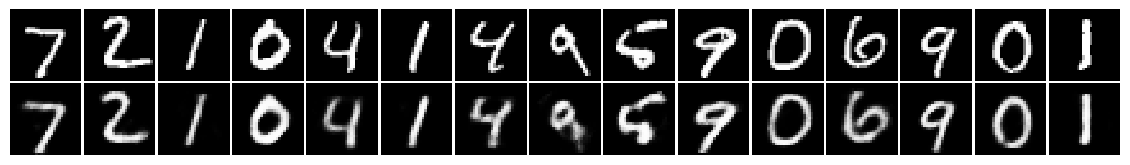

epoch 2 | iter 935 | loss 0.01212
epoch 3 | iter 940 | loss 0.01265


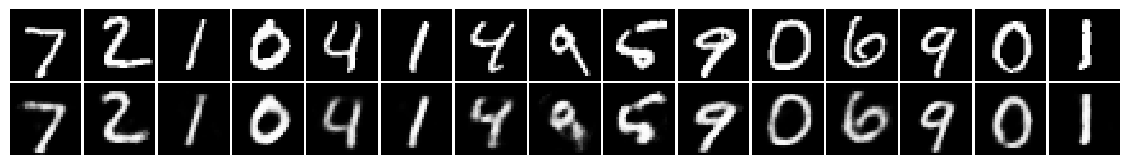

epoch 3 | iter 945 | loss 0.01186
epoch 3 | iter 950 | loss 0.01217


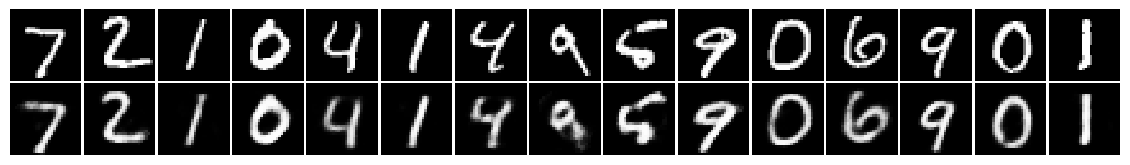

epoch 3 | iter 955 | loss 0.01227
epoch 3 | iter 960 | loss 0.01183


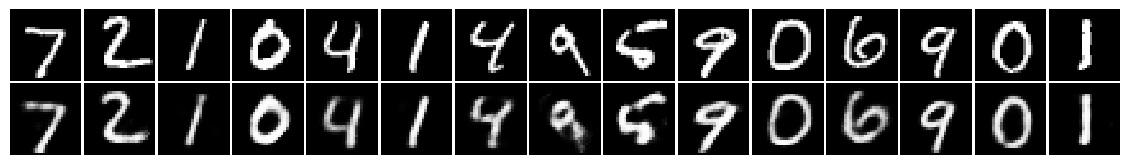

epoch 3 | iter 965 | loss 0.01170
epoch 3 | iter 970 | loss 0.01216


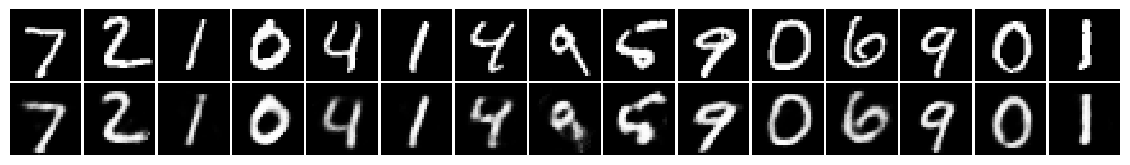

epoch 3 | iter 975 | loss 0.01233
epoch 3 | iter 980 | loss 0.01217


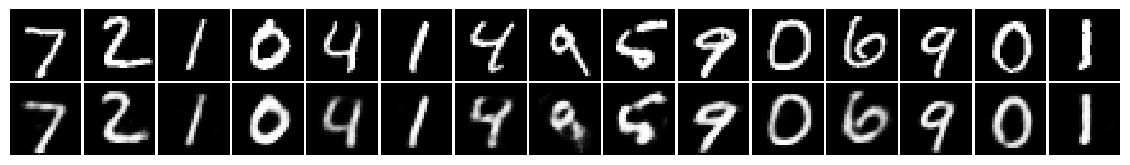

epoch 3 | iter 985 | loss 0.01192
epoch 3 | iter 990 | loss 0.01200


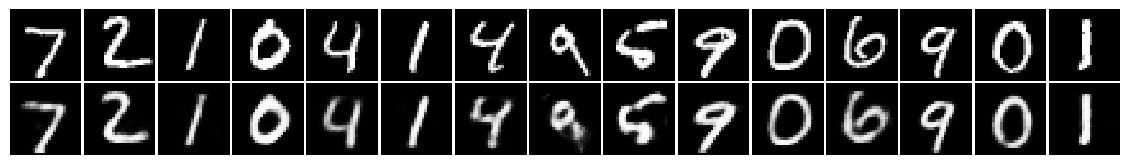

epoch 3 | iter 995 | loss 0.01207
epoch 3 | iter 1000 | loss 0.01236


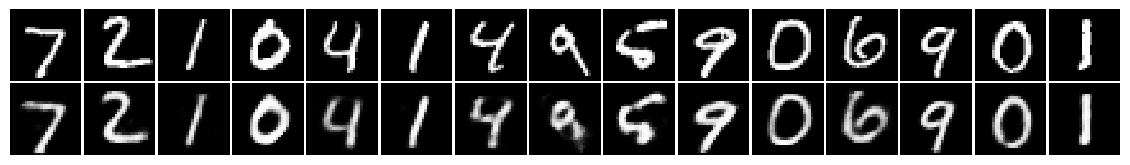

In [12]:
# we will train our Autoencoder for 1000 iterations, it's enough to achieve good results.

train_ae(train_dl, valid_dl, ae, 50, 1000)

#### Visualizing Learned Feature Vectors

In below code, we gonna used only encoder part of trained Autoencoder to go through validation set images and get corresponding feature vectors.

In [0]:
ae.cpu()
z, labels = [], []
for i, (x, y) in enumerate(valid_dl):
    enc = ae.ae[0](x).detach() # doing forward-pass only on encoder part.
    z.append(enc)
    labels.append(y)
z = torch.cat(z, dim=0)
labels = torch.cat(labels, dim=0)

In [14]:
z.shape

torch.Size([10000, 20])

In [15]:
seed_everything()

z = TSNE(n_components=2).fit_transform(z) # applying T-SNE algorithm to reduce make vectors 2D.

df = pd.DataFrame({'x': z[:,0], 
                   'y': z[:,1],
                   'label': labels.numpy()})

df.head()

x          y  label
0  35.320347 -32.801682      7
1  40.860279  30.260475      2
2  59.767391  -0.324429      1
3 -50.648933  31.125458      0
4 -32.814323 -47.985878      4

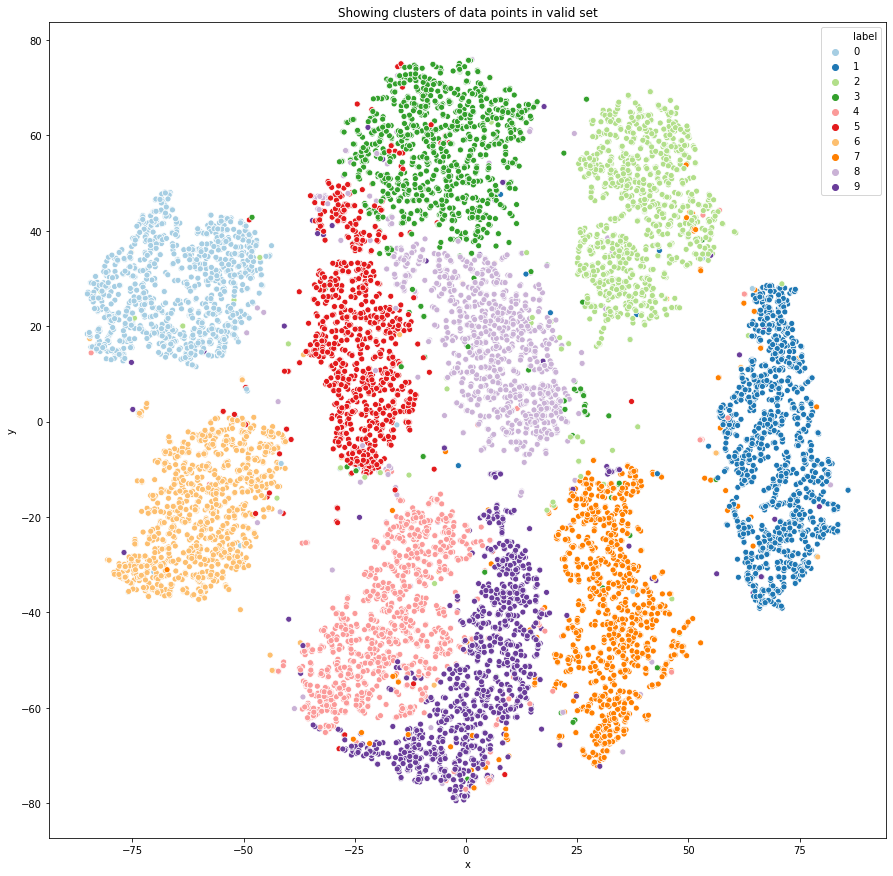

In [16]:
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(x="x", y="y", hue="label", palette=sns.color_palette("Paired", 10), data=df, legend="full")
plt.title('Showing clusters of data points in valid set');

### Fitting Gaussian Mixture Models to separate out clusters

Now we gonna take the above 2D vectors and train GMM model to separate out clusters.

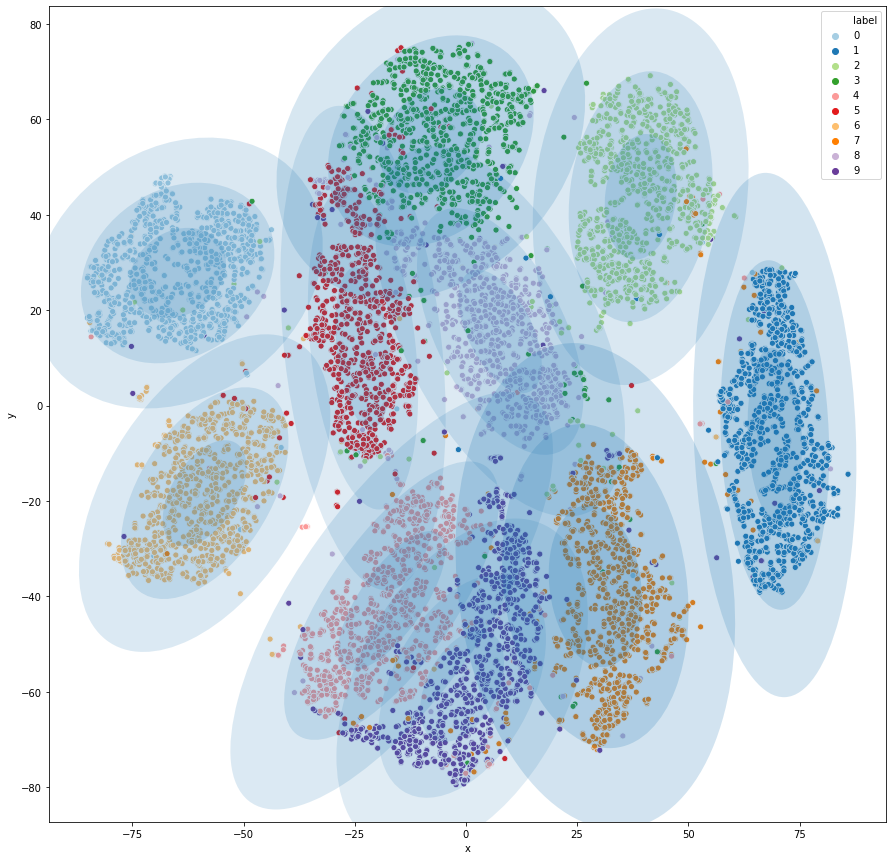

In [17]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
   
def plot_gmm(gmm):
    
    plt.figure(figsize=(15, 15))
    ax = sns.scatterplot(x="x", y="y", hue="label", palette=sns.color_palette("Paired", 10), data=df, legend="full")

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)

gmm = GMM(n_components=10, covariance_type='full', max_iter=300).fit(z) # number of components (number of clusters) equal to 10 digits we have
plot_gmm(gmm)

### Evaluation

Below we gonna take advantage of MNIST labels to evaluate (calculate accuracy) of GMM performance, i.e. we gonna check what's the success rate of GMM assigning a digit to a correct cluster.

Note that, in practice evaluating unsupervised ML models this way is impossible, because we don't have labels.


In [18]:
# we gonna add prediction (cluster assignment) column to our dataframe.
# please note that we need to find a correct cluster-to-label correspondence map, because, for example, cluster=X doesn't imply label=X

df['clusters'] = gmm.predict(z)
df

x          y  label  clusters
0     35.320347 -32.801682      7         7
1     40.860279  30.260475      2         5
2     59.767391  -0.324429      1         3
3    -50.648933  31.125458      0         6
4    -32.814323 -47.985878      4         9
...         ...        ...    ...       ...
9995  38.553658  42.028709      2         5
9996 -13.924991  63.953381      3         4
9997  -3.418975 -27.397150      4         9
9998 -22.532135  -3.614840      5         8
9999 -63.473354  -9.773986      6         2

[10000 rows x 4 columns]

In [0]:
# We assume that vast majority of points within a cluster correspond to the same digit, so for every cluster we find most frequent label of its
# datapoints to build a correspondance map between cluster and label.

grp = df.groupby('label').apply(lambda x: x.clusters.value_counts().index[0])

In [20]:
grp.head(100)

label
0    6
1    3
2    5
3    4
4    9
5    8
6    2
7    7
8    1
9    0
dtype: int64

In [21]:
cluster_to_label = {cluster: label for label, cluster in zip(grp.index, grp.values)}
cluster_to_label

{0: 9, 1: 8, 2: 6, 3: 1, 4: 3, 5: 2, 6: 0, 7: 7, 8: 5, 9: 4}

In [0]:
# we use this map to translate cluster numbers to predictions.

df['pred'] = df.clusters.map(cluster_to_label)
del df['clusters']

In [23]:
df

x          y  label  pred
0     35.320347 -32.801682      7     7
1     40.860279  30.260475      2     2
2     59.767391  -0.324429      1     1
3    -50.648933  31.125458      0     0
4    -32.814323 -47.985878      4     4
...         ...        ...    ...   ...
9995  38.553658  42.028709      2     2
9996 -13.924991  63.953381      3     3
9997  -3.418975 -27.397150      4     4
9998 -22.532135  -3.614840      5     5
9999 -63.473354  -9.773986      6     6

[10000 rows x 4 columns]

In [24]:
# calculating per-class accuracy metric

per_cls_accuracy = df.groupby('label').apply(lambda x: np.mean(x.label == x.pred))
per_cls_accuracy

label
0    0.985714
1    0.991189
2    0.953488
3    0.909901
4    0.843177
5    0.858744
6    0.971816
7    0.939689
8    0.862423
9    0.700694
dtype: float64

In [25]:
# overall accuracy of GMM predicting correct digit.

per_cls_accuracy.mean()

0.9016836413266311